In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import   losses
import warnings
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
tf.config.list_physical_devices(
    device_type=None
)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
train_path = "cell_images\\cell_images\\train"
test_path  = "cell_images\\cell_images\\test"

In [4]:
image_shape = (130, 130, 3)

In [5]:
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1 ,
                               shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode = 'nearest')

In [6]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [7]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [8]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], color_mode='rgb', batch_size=32, class_mode='binary')

Found 24958 images belonging to 2 classes.


In [9]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode='rgb', batch_size=32, class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [10]:
Xception_model = Sequential()

pretrained_model= tf.keras.applications.Xception(include_top=False,
                   input_shape=image_shape,
                   pooling='max',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

Xception_model.add(pretrained_model)

Xception_model.add(Flatten())
Xception_model.add(Dense(128, activation='relu'))
Xception_model.add(Dense(1, activation='sigmoid'))

83683744/83683744 [==============================] - 6s 0us/step


In [11]:
Xception_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 21,123,881
Trainable params: 262,401
Non-trainable params: 20,861,480
_________________________________________________________________


In [12]:
Xception_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [14]:
Xception_model.fit(train_image_gen, epochs=50, validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/50
780/780 [==============================] - 177s 214ms/step - loss: 2.1194 - accuracy: 0.6816 - val_loss: 0.8003 - val_accuracy: 0.7373
Epoch 2/50
780/780 [==============================] - 98s 126ms/step - loss: 0.8200 - accuracy: 0.7279 - val_loss: 0.6102 - val_accuracy: 0.7550
Epoch 3/50
780/780 [==============================] - 98s 125ms/step - loss: 0.7038 - accuracy: 0.7324 - val_loss: 0.5472 - val_accuracy: 0.7738
Epoch 4/50
780/780 [==============================] - 96s 123ms/step - loss: 0.5802 - accuracy: 0.7501 - val_loss: 0.4894 - val_accuracy: 0.7827
Epoch 5/50
780/780 [==============================] - 96s 123ms/step - loss: 0.5382 - accuracy: 0.7543 - val_loss: 0.4477 - val_accuracy: 0.7838
Epoch 6/50
780/780 [==============================] - 95s 122ms/step - loss: 0.5001 - accuracy: 0.7605 - val_loss: 0.5390 - val_accuracy: 0.7415
Epoch 7/50
780/780 [==============================] - 97s 124ms/step - loss: 0.4784 - accuracy: 0.7686 - val_loss: 0.5183 - val_a

In [15]:
history = pd.DataFrame(Xception_model.history.history)

In [16]:
history.head()

,loss,accuracy,val_loss,val_accuracy
0,2.119362,0.681585,0.800344,0.737308
1,0.820036,0.727903,0.610158,0.755000
2,0.703847,0.732430,0.547191,0.773846
3,0.580205,0.750140,0.489424,0.782692
4,0.538194,0.754307,0.447736,0.783846


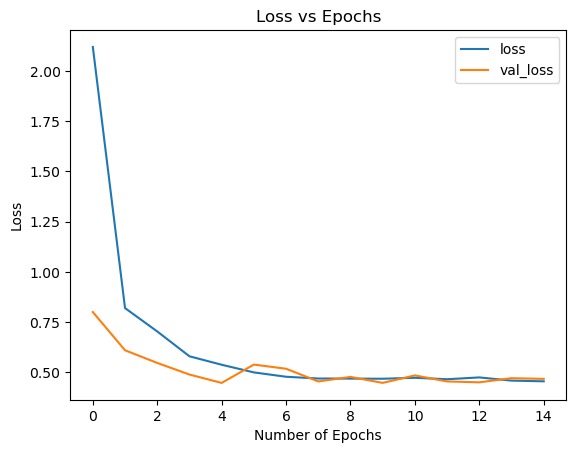

In [17]:
history[["loss", "val_loss"]].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.savefig('LossVsEpochsXcep.png')
plt.show()

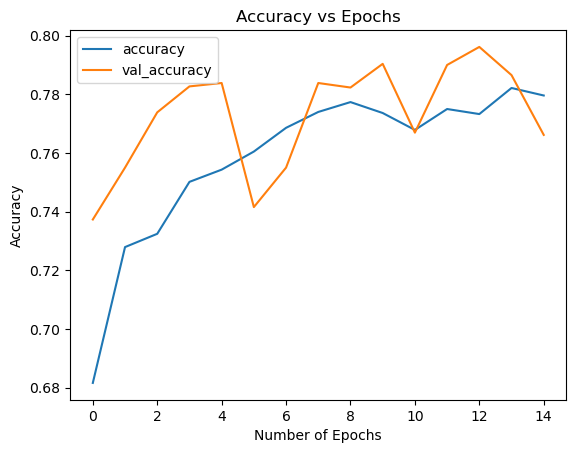

In [18]:
history[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.savefig('AccuracyvsEpochsXcep.png')
plt.show()

In [19]:
predictions = Xception_model.predict(test_image_gen)

82/82 [==============================] - 10s 112ms/step


In [20]:
predictions = predictions >= 0.5

In [21]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      1300
           1       0.74      0.87      0.80      1300

    accuracy                           0.78      2600
   macro avg       0.79      0.78      0.78      2600
weighted avg       0.79      0.78      0.78      2600



In [22]:
confusion_matrix(test_image_gen.classes, predictions)

array([[ 892,  408],
       [ 163, 1137]], dtype=int64)

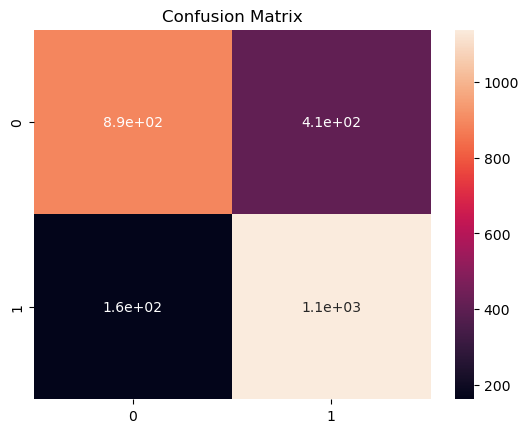

In [23]:
DetaFrame_cm = pd.DataFrame(confusion_matrix(test_image_gen.classes, predictions), range(2), range(2))
sns.heatmap(DetaFrame_cm, annot=True)
plt.title("Confusion Matrix")
plt.savefig('ConfusionMatrixHeatmapXcep.png')
plt.show()

In [24]:
Xception_model.save("MalariaPredictionsXcep.h5")